In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import sklearn
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import make_blobs, make_circles
from tqdm import tqdm
#import h5py

In [4]:
def init(layers_dim):
    """
    initialize parameters of the deep neural network
    layers_dim: list contains number of units in each layer
    """
    L = len(layers_dim)
    parameters = {}
    for l in range(1,L):
        parameters["W"+str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1])*0.0001
        parameters["b"+str(l)] = np.zeros((layers_dim[l],1))
    return parameters

In [5]:
#Sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """ 
    g = 1/(1+np.exp(-z))
    return g

In [6]:
def forward_propagation(parameters, X):
    """
    Args:
        parameters: python dictionary containing our parameters (W1,b1,W2,b2, ... WL,bL)
        X: input data of size (n_x, m)
    
    Returns:
        activations: python dictionary containing output of each layer (A0, A1, ... AL)
    """
    activations = {"A0" : X}
    L = len(parameters)//2
    for l in range(1,L+1):
        Z = np.dot(parameters["W"+str(l)],activations["A"+str(l-1)]) + parameters["b"+str(l)]
        activations["A"+str(l)] = sigmoid(Z)
    return activations

**For the derivatives and to gain more mathematical intuition behind backpropagation check this [link](https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60) in medium**

In [7]:
def back_propagation(parameters,Y, activations):
    """
    Implement the backward propagation using instructions from the link above. 
    
    Args:
        parameters: python dictionary containing our parameters 
        Y: labels vector of shape (1, number of examples)
        activations: dictionary containing A1, A2 .. AL .
    
    Returns:
        grads: python dictionary containing your gradients with respect to different parameters
    """
    m = Y.shape[1]
    L = len(parameters)//2
    
    dZ = activations["A"+str(L)] - Y
    gradients = {}
    for l in range(L,1,-1):
        gradients["dW"+str(l)] = np.dot(dZ,activations["A"+str(l-1)].T)
        gradients["db"+str(l)] = np.sum(dZ,axis=1,keepdims=True)
        dZ = np.dot(parameters["W"+str(l)].T,dZ)*activations["A"+str(l-1)]*( 1 - activations["A"+str(l-1)])
    gradients["dW1"] = np.dot(dZ,activations["A0"].T)
    gradients["db1"] = np.sum(dZ,axis=1,keepdims=True)
    return gradients

In [8]:
def update(parameters, gradients, learning_rate):
    """
    Updates parameters using the gradient descent 
    Args:
        parameters: python dictionary containing our parameters 
        gradients: python dictionary containing our gradients 
        learning_rate: 
        
    Returns:
        parameters: python dictionary containing your updated parameters
    """
    L = len(parameters)//2
    for l in range(1,L+1):
        parameters["W"+str(l)] -= learning_rate*gradients["dW"+str(l)]
        parameters["b"+str(l)] -= learning_rate*gradients["db"+str(l)]
        
    return parameters

In [16]:
def predict(parameters,X):
    """
    Args:
        parameters: python dictionary containing our parameters 
        X: vector of features or matrix for miltuple vectors
    Returns:
           vector of predictions of our model (red: 1 / blue: 0)
    """
    L = len(parameters)//2
    activations = forward_propagation(parameters,X)
    AL = activations['A'+str(L)]
    return AL > 0.5

In [23]:
def train_neural_network(X_train, Y_train,X_test = None, Y_test=None ,hidden_layers_dim = [16,16,10] ,learning_rate = 0.1, n_iter = 10000):
    """
    Train the neural network 
    Args:
        X_train: training set: matrix of input examples, each colone is an example shape=(n,m) n: number of features, m: number of examples
        Y_train: vector of target values
        X_tes: test set (optional)
        Y_test: vector of target values to test the model (optional)
        hidden_layes_dim: list contains number of units in each layer
        learning_rate: hyperparameter, step of moving towords the min of cost function
        n_iter: number of iterations 
    """
    layers_dim = hidden_layers_dim
    layers_dim.insert(0,X_train.shape[0])
    layers_dim.append(Y_train.shape[0])
    
    # initialisation of params
    parameters = init(layers_dim)
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []
    history = []
    L = len(parameters)//2
    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(parameters,X_train)
        AL = activations['A'+str(L)]

        # Plot learning
        if i%10 == 0:
            train_loss.append(log_loss(Y_train.flatten(), AL.flatten()))
            y_pred = predict( parameters,X_train)
            train_accuracy.append(accuracy_score(Y_train.flatten(), y_pred.flatten()))
            history.append([parameters.copy(), train_loss, train_accuracy, i])
            if X_test is not None:
                 AL_test = forward_propagation(X_test,parameters)['A'+str(L)]
                 test_loss.append(log_loss(Y_test.flatten(), AL_test.flatten()))
                 y_test = predict(parameters,X_test)
                 test_accuracy.append(accuracy_score(Y_test.flatten(), y_test.flatten()))
        # update
        gradients = back_propagation( parameters, Y_train, activations)
        parameters = update(parameters, gradients, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    if X_test is not None:
        plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='train accuracy')
    if X_test is not None:
        plt.plot(test_accuracy, label='test accuracy')
    plt.legend()
    plt.show()
    return parameters

dimensions de X: (2, 1000)
dimensions de y: (1, 1000)


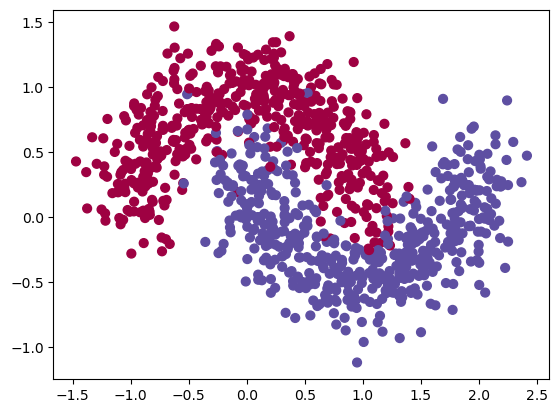

In [24]:
X, y = sklearn.datasets.make_moons(1000, noise=0.20)

X = X.T
Y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', Y.shape)
plt.scatter(X[0,:], X[1,:], s=40, c=Y, cmap=plt.cm.Spectral)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1395.84it/s]


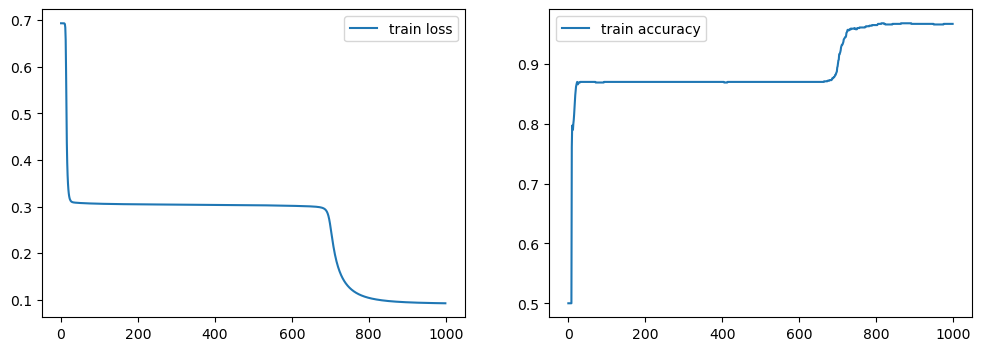

In [33]:
#Train the model
params = train_neural_network(X, Y,hidden_layers_dim=[3],learning_rate=0.001,n_iter=10000)

In [26]:
def plot_decision_boundary(pred_function,X, Y):
    """
    
    """
    
    xx, yy = np.meshgrid( np.linspace(X[0,:].min(), X[0,:].max(), 100), np.linspace(X[1,:].min(), X[1,:].max(), 100))
    Z = pred_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], s=40, c=Y, cmap=plt.cm.Spectral)
    plt.show()

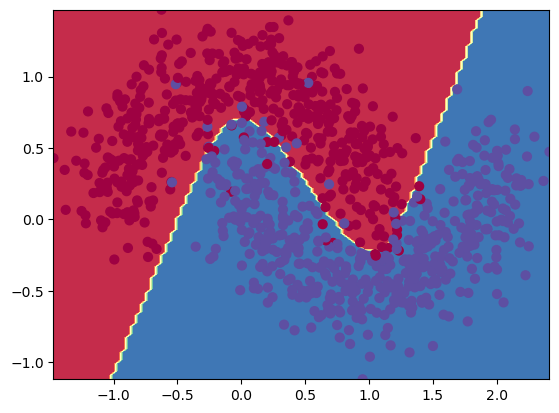

In [27]:
plot_decision_boundary(lambda x: predict(params, x.T),X,Y)

***when we use deep neural network, we get high variance, and that is obvious because we have just two features and simple
model, howewer the model will work well with complex data like images using more than one hidden layer.
Nice! Our neural networks was able to find a decision boundary that successfully separates the classes, which simple line can not do with logistic regression***